##### sigmoid function -> it gives a value in the range of 0 - 1 , very usefull
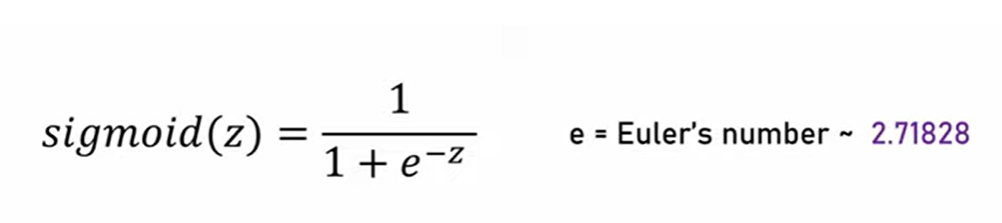

##### logit and sigmoid function are inverse of each other , i.e sigmoid function converts any value in range of 0 and 1 whereas logit function converts any value between 0 and 1 to real numbers between -inf to +inf

##### sigmoid function also has problem of vanishing gradient problem

#### sigmoid function act as activation function in neuron

##### NEURON: a neuron consit of linear equation of a function and then whatever is output it tries to convert it in some range (eg. 0 to 1 , -1 to 1 ). such function are called activation function

#### neuron visualization in matematical terms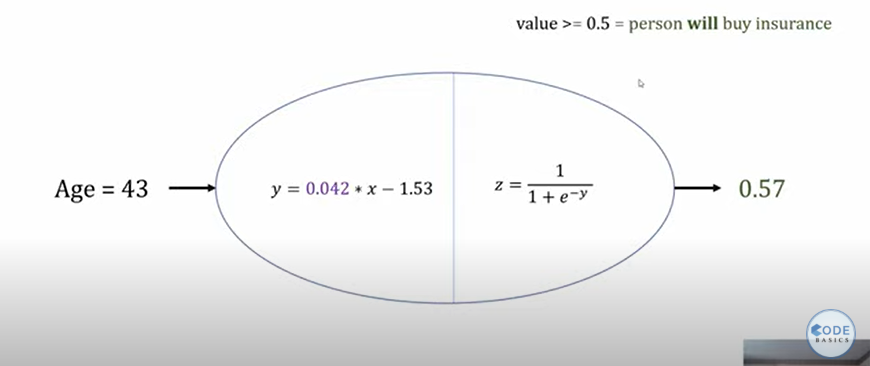

##### in above figure the circle represent a neuron , where y = mx + b is a linear function, in real neuron it can be any other function as well but it is always a mathematical function, second part is activation function which converts the output of the first function which is y in a range of 0 to 1.

##### 
      age -> a feature(in term of ml) , in above figure
      0.041 is weight   y = wx + b
      b -> bias

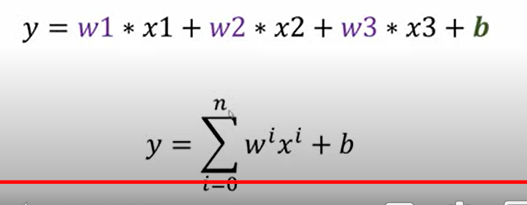

##### hidden layers: in these layers feature detection takes place i.e the main work of neural network

### training a small neural network for detecting handwritten numbers

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [53]:
(X_train , y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [54]:
len(X_train)

60000

In [55]:
len(X_test)

10000

In [56]:
X_train[0].shape

(28, 28)

In [57]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

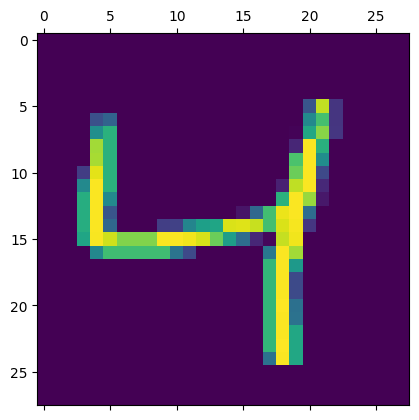

In [58]:
plt.matshow(X_train[2])

In [59]:
y_train[2]

4

##### we have to flatten this 28*28 neural network since the neuron will handle in that way only

In [60]:
len(X_train)

60000

In [61]:
X_train.shape   #it is saying there are 60k images with each iamge of size 28*28 pixels

(60000, 28, 28)

In [62]:
#reducing the value between 0 and 1 for each pixels for easy calculation , this is not required but suggested for efficient calculation
X_train = X_train/255.0
X_test = X_test/255.0

In [63]:
X_train_flattened = X_train.reshape(len(X_train),28*28)  #we are flattening the input data from 2d image to 1d flattened pixels
X_test_flattend = X_test.reshape(len(X_test),28*28)

In [64]:
X_train_flattened.shape

(60000, 784)

In [65]:
X_test_flattend.shape

(10000, 784)

##### creating neural network

In [66]:
model = keras.Sequential([
    #we are saying input shape is 784 and output are 10 neurons
    keras.layers.Dense(10,input_shape= (784,),activation = 'sigmoid')
])
model.compile(
                optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.fit(X_train_flattened,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 779us/step - loss: 0.4640 - accuracy: 0.8791
Epoch 2/5
1875/1875 [==============================] - 1s 772us/step - loss: 0.3035 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 1s 768us/step - loss: 0.2829 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 1s 772us/step - loss: 0.2727 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 1s 772us/step - loss: 0.2668 - accuracy: 0.9254


In [67]:
X_test_flattend[0].shape

(784,)

In [68]:
model.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 0s 654us/step - loss: 0.2710 - accuracy: 0.9241


[0.2710331678390503, 0.9240999817848206]

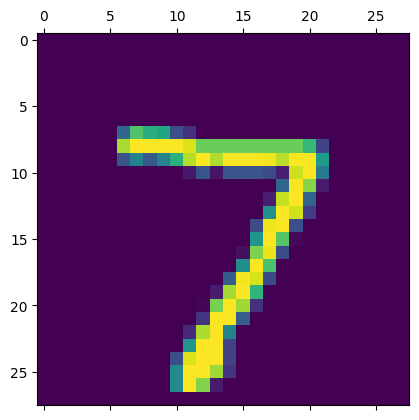

In [72]:
plt.matshow(X_test[0])

In [73]:
Y_predicted = model.predict(X_test_flattend)

313/313 [==============================] - 0s 528us/step


In [74]:
np.argmax(Y_predicted[0])

7

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_1_input')>

(1, 784)
1/1 [==============================] - 0s 17ms/step
0
0


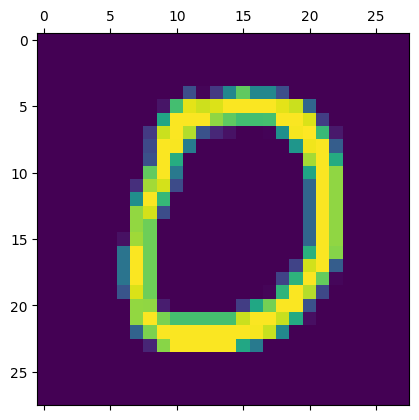

In [84]:
#predicting a single image ouptut using tensorflow expand_dims function to increase number of images dimension
batch_input = tensorflow.expand_dims(X_test_flattend[10], axis=0)
print(batch_input.shape)

#prediction
single_image_prediction = model.predict(batch_input)
exact_predicted_value  = np.argmax(single_image_prediction)

#original value
print(y_test[10])
#predicted value
print(exact_predicted_value)
plt.matshow(X_test[10])

In [90]:
#drawing confusion matrix
#in the below we are getting final single output out of the probablility of all the numbers
y_predicted_final = [np.argmax(i) for i in Y_predicted]
y_predicted_final[:10]

cn = tensorflow.math.confusion_matrix(labels=y_test, predictions = y_predicted_final)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    3,    5,    1,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [  10,    9,  921,   17,    5,    2,   14,    8,   41,    5],
       [   4,    0,   19,  925,    0,   21,    3,    9,   20,    9],
       [   2,    1,    5,    2,  894,    0,   15,    4,   10,   49],
       [  11,    2,    3,   36,    7,  770,   22,    4,   30,    7],
       [  14,    3,    6,    1,    7,    7,  917,    2,    1,    0],
       [   3,    5,   24,    9,    6,    1,    0,  934,    3,   43],
       [   9,    6,    7,   24,    8,   26,   12,    7,  864,   11],
       [  12,    6,    1,   11,   18,    6,    0,   10,    5,  940]])>

Text(95.72222222222221, 0.5, 'Prediction')

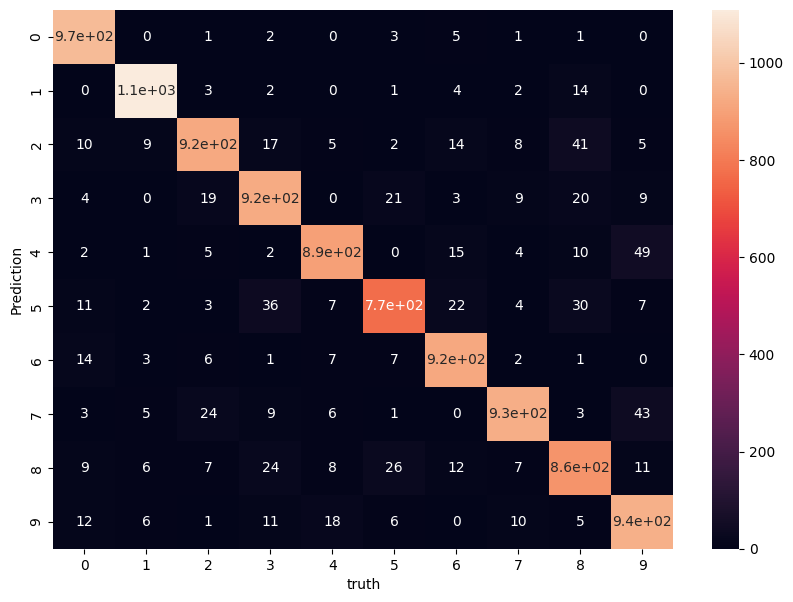

In [93]:
import seaborn as sn

plt.figure(figsize =(10,7))
sn.heatmap(cn,annot=True)
plt.xlabel('truth')
plt.ylabel('Prediction')

##### writing flatten function inside the model itself

In [96]:
flattend_layer_embedded_model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(10,activation = 'sigmoid')
])
flattend_layer_embedded_model.compile(
                optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

flattend_layer_embedded_model.fit(X_train,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 812us/step - loss: 0.4735 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 1s 769us/step - loss: 0.3043 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 1s 766us/step - loss: 0.2836 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 1s 767us/step - loss: 0.2726 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 1s 772us/step - loss: 0.2669 - accuracy: 0.9256


In [101]:
#creating a batch
  = tensorflow.expand_dims(X_test[0], axis=0)
image_input.shape

#calling prediction this way 
print(np.argmax(flattend_layer_embedded_model(image_input)))

#or the normal way
np.argmax(flattend_layer_embedded_model.predict(image_input))

7
1/1 [==============================] - 0s 28ms/step


7

## Activation functions

##### see how activation function is used in hidden layers as well, so the activation function is used in all the layers , the output as well as the hidden layers.  sigma is denoting activation function
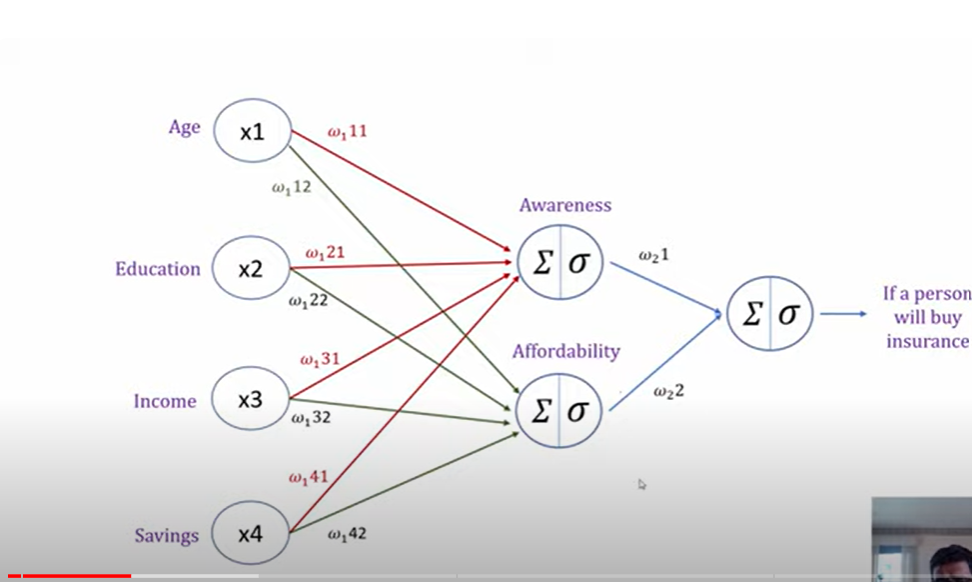

##### if we remove activation function from the hidden layers then there is no need of hidden layers since the output of hidden layers will be waited sum only or a linear equation

##### sigmoid activation function -> it is usefull in multi-class classificaiton since it is a smooth curve and hence it gives probable value for any number of class present in the data
##### step function is used for binary classification since it will give 0 or 1 

### suggestion and direction -> use sigmoid activation function in the output layer and relu in the hidden layers, if you are not sure

##### sigmoid and tanh has vanishing gradient i.e the derivative comes close to 0 and hence no learning or learning very slow and hence a new better function came into existence RELU
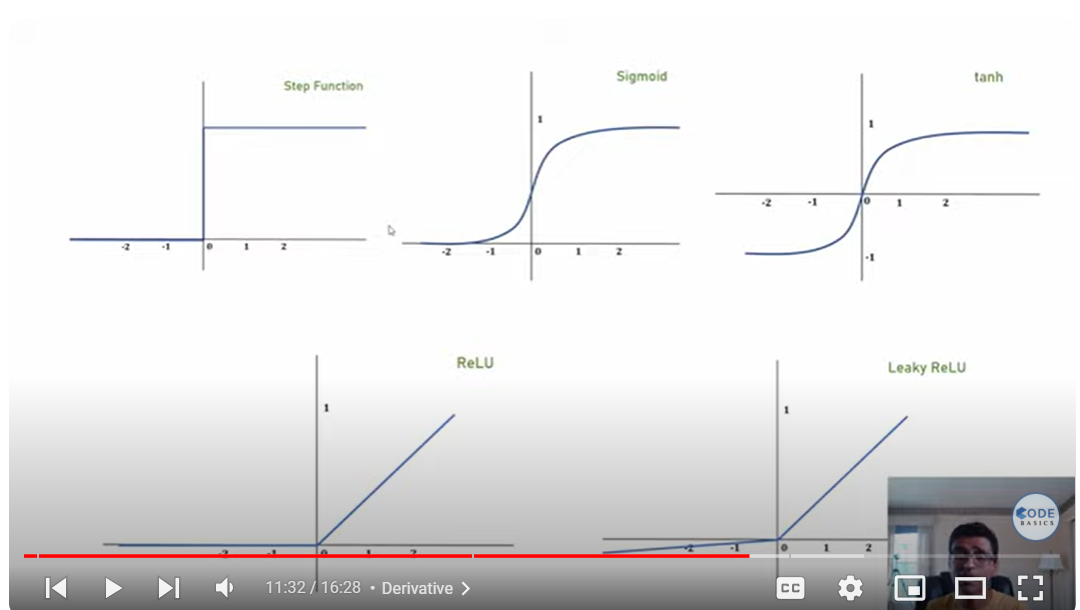

In [102]:
#sigmoid function
import math
def sigmoid(x):
    return 1/(1 + math.exp(-x))


In [103]:
sigmoid(244)

1.0

In [110]:
def tan_h(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [111]:
tan_h(-500)
tan_h(-5)
tan_h(50)

1.0

In [112]:
def relu(x):
    return max(0,x)

In [114]:
print(relu(50))
print(relu(-40))

50
0


In [115]:
def leaky_relu(x):
    return max(0.1*x, x)

In [116]:
print(leaky_relu(-20))

-2.0


##### derivative is normal differentiation eg. y = x^2  it's derivate is 2x , derivate means the change in y with respect to change in x
##### PARTIAL DERIVATIVE : the given function can be mix of more than one variable and then we have to find derivate with respect to some variable.eg 
f(x,y) = 5^x2 + 7y^3
so partial derivate with respect to x will be   df(x,y)/dx  = 10x + 0
df(x,y)/dy = 0+ 21x^2

#### matrix

In [1]:
import numpy as np

In [2]:
revenue = np.array([[100,200,220],[24,36,40],[12,18,20]])
expenses = np.array([[80,90,100],[10,16,20],[0,10,10]])

In [4]:
profit = revenue- expenses
profit

array([[ 20, 110, 120],
       [ 14,  20,  20],
       [ 12,   8,  10]])

In [5]:
units_sold = np.array([[80,90,100],[10,16,20],[0,10,10]])
price_per_unit = np.array([1000,400,1200])

In [10]:

#here the shape of matrixes were not same hence it tried to do BROADCASTING
#BROADCASTING is increasing the dimension of smaller matrix by copying it again and again
#so price_per_unit becomes np.array([[1000,400,1200],[1000,400,1200],[1000,400,1200]])
total_sale = units_sold* price_per_unit
total_sale

array([[ 80000,  36000, 120000],
       [ 10000,   6400,  24000],
       [     0,   4000,  12000]])

In [11]:
#doing proper dot product
np.dot(units_sold, price_per_unit)

array([236000,  40400,  16000])

#### LOSS

##### great explanation of loss in picture wise , 1,1 on arrow are initial assumed weight values
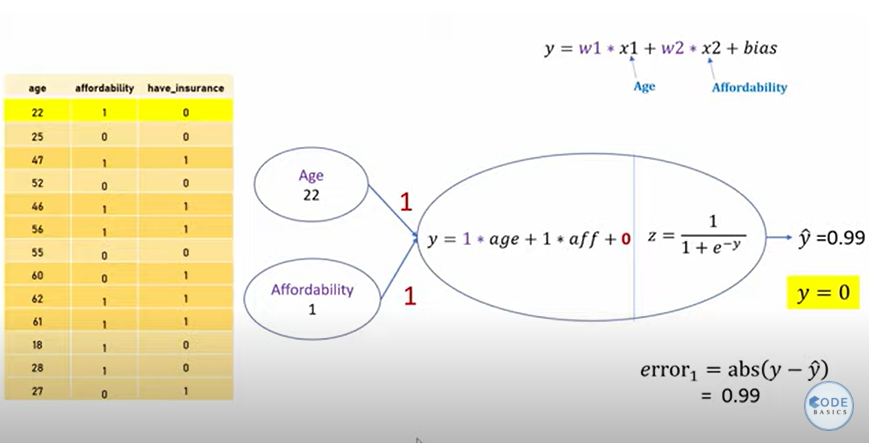

##### ONE EPOCH -> is going through all the samples once and calculating all the loss and using it to calculate total error. mean absolute error = sum of all errors(all samples error like in the picture single error is shown for first sample) / n(i.e no of samples)

some sample error
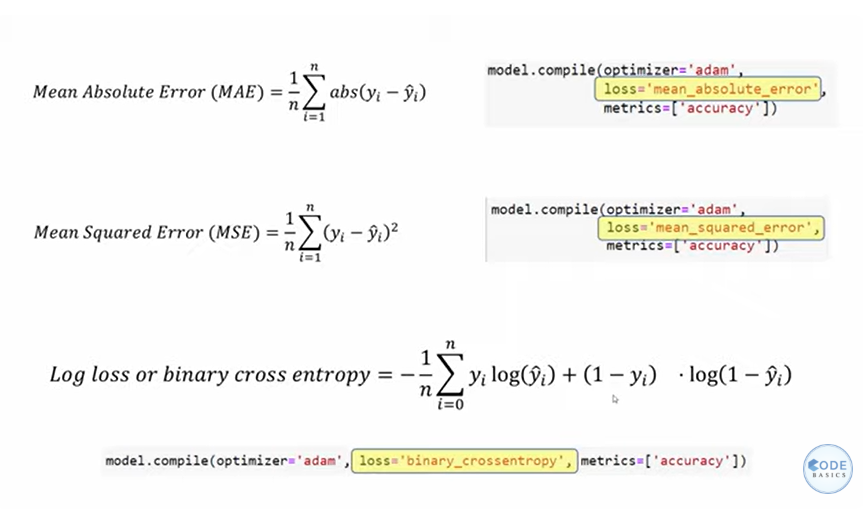

##### implementing errors 

In [19]:
y_predicted = np.array([1,1,0,0,1])
y_true = np.array([.30,0.7,1.0,0.0,0.5])

In [20]:
#mean absolute error using normal functions
def mean_absolute_error(y_predicted, y_true):
    total_error = 0
    for yp, yt in zip(y_predicted, y_true):
        print(yp, yt)
        total_error+=abs(yp-yt)
    print(total_error)
    return total_error/len(y_predicted)

mean_absolute_error(y_predicted, y_true)  

1 0.3
1 0.7
0 1.0
0 0.0
1 0.5
2.5


0.5

In [21]:
#mean absolute error using numpy 
def mean_absolute_error_using_numpy(y_predicted, y_true):

    # EXPLANATION WAY
    # error_array = np.abs(y_predicted-y_true)
    # print(error_array)
    # total_error = np.sum(error_array)
    # print(total_error)
    # mean_abs_error = total_error/len(y_predicted)
    # return mean_abs_error;

    #IN SINGLE LINE
    return np.mean(np.abs(y_predicted-y_true))


mean_absolute_error_using_numpy(y_predicted, y_true)
    

0.5

In [22]:
#mean squared error
def mean_squared_error(y_predicted, y_true):
    diff_arr = np.subtract(y_predicted, y_true)
    print(diff_arr)
    square_arr = np.square(diff_arr)
    print(square_arr)
    mean_value  = np.mean(square_arr)
    return mean_value
    
mean_squared_error(y_predicted, y_true)

[ 0.7  0.3 -1.   0.   0.5]
[0.49 0.09 1.   0.   0.25]


0.366

#### log loss of binary cross entrophy

In [23]:
#log loss or binary cross entropy
epsilon = 1e-15
#here we are trying to replace 0 with value very close to 0 but not zero
y_predicted_new = [max(i,epsilon) for i in y_predicted]
y_predicted_new

[1, 1, 1e-15, 1e-15, 1]

In [24]:
#converting 1 to a value close to 1 but not 1
y_predicted_new = [min(i, 1-epsilon) for i in y_predicted_new]
y_predicted_new

[0.999999999999999, 0.999999999999999, 1e-15, 1e-15, 0.999999999999999]

In [25]:
y_predicted_new = np.array(y_predicted_new)
print(np.log(y_predicted_new))

#the above was done to avoid this below issue
np.log(y_predicted) #i.e divison by 0 value

[-9.99200722e-16 -9.99200722e-16 -3.45387764e+01 -3.45387764e+01
 -9.99200722e-16]


C:\Users\Ravindra\AppData\Local\Temp\ipykernel_1516\3693299586.py:5: RuntimeWarning: divide by zero encountered in log
  np.log(y_predicted) #i.e divison by 0 value


array([  0.,   0., -inf, -inf,   0.])

In [17]:
#everyting from above cells for log loss in a single function
epsilon = 1e-15
def log_loss(y_predicted, y_true):
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i, 1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true* np.log(y_predicted_new)+ (1- y_true)*np.log(1-y_predicted_new))
    

In [54]:
log_loss(y_predicted, y_true)

17.2696280766844

#### GRADIENT DESCENT

##### naming conventions: 
##### weighted sum -> the normal function i.e y = wixi + b is weighted sum , it is the first part of neuron in the first picture shown in this notebook 

##### GRADIENT DESCENT it is the process of determining the values of weights. 

##### here we are saying how the loss will change with respect to constansts 
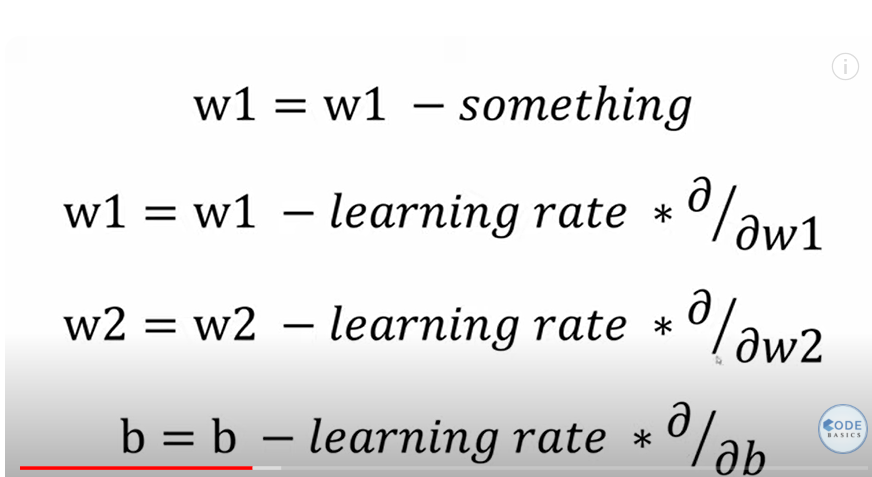

##### we have calculated the d(loss)/d(dw1)  using normal derivates of the loss function and similarly for others constansts, don't worry we will be calculating it manually below
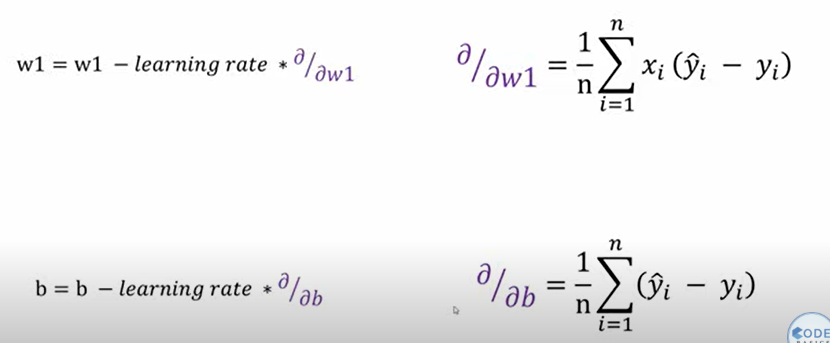

##### types of gradient descent:
    1. batch gradient descent: the constants(weights and bias) are updated after calcluating the loss for all the samples 
    2. Stochastic gradient descent (SGD): the constants(bias and weights) are updated after calculating loss for each sample
    3. Mini-batch gradient descent: combination of both above

##### 1. in the below figure see how the tangent which is slope or gradient is guiding us to a point where the loss is minimal or global minima of the loss i.e the predicted value is very close to real value.
##### 2. see how the gradient is decreasing(i.e why called gradient descent)

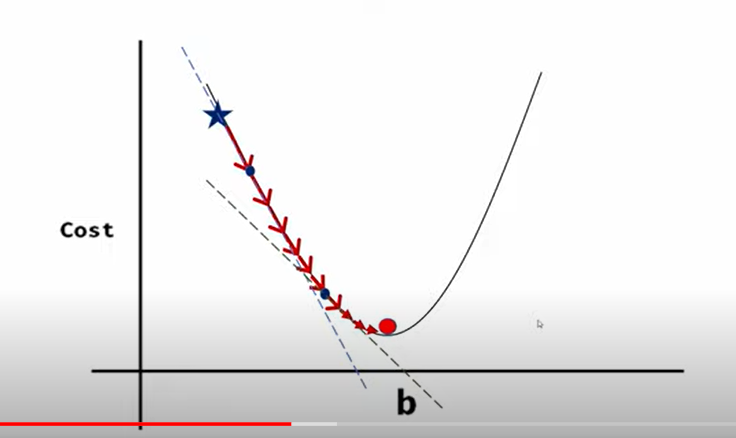


In [2]:
import pandas as pd

In [3]:
dataframe = pd.read_csv('insurance_data.csv')

In [4]:
dataframe.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [5]:
#dividing the dataset into test and train part using sklearn
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataframe[['age','affordibility']], dataframe.bought_insurance,test_size=0.2, random_state=25)

In [7]:
len(X_train)
len(dataframe)

28

In [8]:
#scalling the age from range between 0-100 to 0-1 for better performance
#creating deep copy
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age']/100
X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100

In [9]:
X_train_scaled.head()

,age,affordibility
0,0.22,1
13,0.29,0
6,0.55,0
17,0.58,1
24,0.50,1


In [10]:
model = keras.Sequential(
    [
        #input_shape 2 since two input
        keras.layers.Dense(1, input_shape=(2,), activation='sigmoid')
    ]
)

In [11]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [15]:
model.fit(X_train_scaled,y_train, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 207ms/step - loss: 0.6705 - accuracy: 0.5000
Epoch 2/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.5000
Epoch 3/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6703 - accuracy: 0.5000
Epoch 4/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6701 - accuracy: 0.5000
Epoch 5/5000
1/1 [==============================] - 0s 0s/step - loss: 0.6700 - accuracy: 0.5000
Epoch 6/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.5000
Epoch 7/5000
1/1 [==============================] - 0s 309us/step - loss: 0.6698 - accuracy: 0.5000
Epoch 8/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.5000
Epoch 9/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6696 - accuracy: 0.5000
Epoch 10/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.5000
Epoch 11/5000
1/1 

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.6818
Epoch 1258/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.6818
Epoch 1259/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.6818
Epoch 1260/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5744 - accuracy: 0.6818
Epoch 1261/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.6818
Epoch 1262/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5743 - accuracy: 0.6818
Epoch 1263/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5743 - accuracy: 0.6818
Epoch 1264/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5742 - accuracy: 0.6818
Epoch 1265/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5742 - accuracy: 0.6818
Epoch 1266/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.6818
Epoch 1

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 16ms/step - loss: 0.5218 - accuracy: 0.7273
Epoch 2584/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5218 - accuracy: 0.7273
Epoch 2585/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5217 - accuracy: 0.7273
Epoch 2586/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5217 - accuracy: 0.7273
Epoch 2587/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5217 - accuracy: 0.7273
Epoch 2588/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5216 - accuracy: 0.7273
Epoch 2589/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.5216 - accuracy: 0.7273
Epoch 2590/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5216 - accuracy: 0.7273
Epoch 2591/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5215 - accuracy: 0.7273
Epoch 2592/5000
1/1 [==============================] - 0s 0s/step - loss: 0.5215 - accuracy: 0.7273
Epoch 2593/5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 16ms/step - loss: 0.4879 - accuracy: 0.8636
Epoch 3836/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4879 - accuracy: 0.8636
Epoch 3837/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4879 - accuracy: 0.8636
Epoch 3838/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4878 - accuracy: 0.8636
Epoch 3839/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4878 - accuracy: 0.8636
Epoch 3840/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4878 - accuracy: 0.8636
Epoch 3841/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.4878 - accuracy: 0.8636
Epoch 3842/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4878 - accuracy: 0.8636
Epoch 3843/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4877 - accuracy: 0.8636
Epoch 3844/5000
1/1 [==============================] - 0s 0s/step - loss: 0.4877 - accuracy: 0.8636
Epoch 3845/5

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [16]:
model.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 181ms/step - loss: 0.3565 - accuracy: 1.0000


[0.3565499484539032, 1.0]

In [17]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 117ms/step


array([[0.7043792 ],
       [0.36190784],
       [0.15562025],
       [0.4819701 ],
       [0.7245666 ],
       [0.8265195 ]], dtype=float32)

In [20]:
y_test  #so all of them are correct if we compare with the output in previous cell

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

In [21]:
coef, intercept = model.get_weights()

In [22]:
coef

array([[4.9494224],
       [1.5200441]], dtype=float32)

In [23]:
intercept

array([-2.9780333], dtype=float32)

### building the same neural network using python 

#### below is just more understanding how the things are happening in the above model creation

In [12]:
X_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [13]:
#sigmoid function
import math
def sigmoid(x):
    return 1/(1 + math.exp(-x))

In [14]:
#how above neuron is working 
#we are calculating the weighted sum using the above coeficients and then doing sigmoid on that 
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)


#it gives the same output as the model.predict
prediction_function(0.47, 1)

NameError: name 'coef' is not defined

#### model creation using python function

In [15]:
#it's loss calculation function which we have studied above

epsilon = 1e-15
def log_loss(y_predicted, y_true):
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i, 1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true* np.log(y_predicted_new)+ (1- y_true)*np.log(1-y_predicted_new))

In [16]:
#activation function
#sigmoid for a np array
#sigmoid function
import math
def sigmoid_numpy(X):
    return 1/(1 + np.exp(-X))
sigmoid_numpy(np.array(X_train_scaled['age']))

array([0.55477924, 0.57199613, 0.63413559, 0.64106741, 0.62245933,
       0.54487889, 0.63181242, 0.5621765 , 0.55230791, 0.62714777,
       0.64565631, 0.5621765 , 0.63645254, 0.61301418, 0.65021855,
       0.54735762, 0.5670929 , 0.61063923, 0.59868766, 0.63413559,
       0.55724785, 0.61301418])

#### BELOW ONE CELL IS VERY IMPORTANT TO UNDERSTAND EVERYTHING ABOUT DNN

In [17]:


def manual_train(age, affordibility, y_train, epochs, loss_threshold):
    #initial random constants
    w1 = w2 = 1
    bias = 0
    #learning rate assumed to be 0.5 , it is tunable , it's a hyper parameter
    learning_rate = 0.5
    n = len(age)
    for i in range(epochs):
        #weighted sum the first part of the neuron in the picture where nomral value function value is calculated by putting independent variables
        weighted_sum = age*w1 + affordibility*w2 + bias
        #second part of the neuron , where we bring the output in a certain range here using sigmoid function. this will be our final predicted y
        y_predicted = sigmoid_numpy(weighted_sum)
        #we are calculating the loss here i.e the difference between predicted and real values of y, here we are using log loss , we could use mean error, mean squared error and many others, few functions are defined above
        loss = log_loss(y_predicted, y_train)
        #now here we have to update the weights

        #here we calculating the change in the weights and bias with the above loss
        #formula w1 = w1-learning_rate*d(loss)/d(w1) and similarly for w2 and bias
        #we have the formula for calulating d(loss)/d(w1), d(loss)/d(w2), d(loss)/d(bias), it's in the image above ,using that
        w1_reduction =     (1/n)*(np.dot(np.transpose(age),(y_predicted-y_train)))
        w2_reduction =     (1/n)*(np.dot(np.transpose(affordibility),(y_predicted-y_train)))
        bias_reduction = np.mean(y_predicted-y_train)
        #updating the weigths
        w1 = w1- learning_rate* w1_reduction
        w2 = w2 - learning_rate* w2_reduction
        bias = bias - learning_rate * bias_reduction
        print(f'epoch ={i}, loss = {loss} w1 = {w1}, w2 = {w2}, bias = {bias}')
        #this part is done to  break if we reach a certain loss value even before running all the epochs
        if (loss < loss_threshold):
            break


In [ ]:
manual_train(X_train_scaled['age'], X_train_scaled['affordibility'],y_train, 1000, 0.4631)

##### writing the neural network as a class

In [26]:
class NN:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.bias = 0
    def fit(self,x , y, epochs, loss_threshold):
        self.w1, self.w2, self.bias = self.gradient_descent(x['age'], x['affordibility'], y, epochs, loss_threshold)

    def predict(self, x_test):
        weighted_sum = self.w1*x_test['age'] + self.w2*x_test['affordibility'] + self.bias
        sigmoid_value = sigmoid_numpy(weighted_sum)
        return sigmoid_value
    #this is from the above cell
    def gradient_descent(self, age, affordibility, y_true, epochs, loss_threshold):
        #initial random constants
        w1 = w2 = 1
        bias = 0
        #learning rate assumed to be 0.5 , it is tunable , it's a hyper parameter
        learning_rate = 0.5
        n = len(age)
        for i in range(epochs):
            #weighted sum the first part of the neuron in the picture where nomral value function value is calculated by putting independent variables
            weighted_sum = age*w1 + affordibility*w2 + bias
            #second part of the neuron , where we bring the output in a certain range here using sigmoid function. this will be our final predicted y
            y_predicted = sigmoid_numpy(weighted_sum)
            #we are calculating the loss here i.e the difference between predicted and real values of y, here we are using log loss , we could use mean error, mean squared error and many others, few functions are defined above
            loss = log_loss(y_predicted, y_train)
            #now here we have to update the weights
    
            #here we calculating the change in the weights and bias with the above loss
            #formula w1 = w1-learning_rate*d(loss)/d(w1) and similarly for w2 and bias
            #we have the formula for calulating d(loss)/d(w1), d(loss)/d(w2), d(loss)/d(bias), it's in the image above ,using that
            w1_reduction =     (1/n)*(np.dot(np.transpose(age),(y_predicted-y_train)))
            w2_reduction =     (1/n)*(np.dot(np.transpose(affordibility),(y_predicted-y_train)))
            bias_reduction = np.mean(y_predicted-y_train)
            #updating the weigths
            w1 = w1- learning_rate* w1_reduction
            w2 = w2 - learning_rate* w2_reduction
            bias = bias - learning_rate * bias_reduction

            #less printing
            if i % 50 == 0 :
                print(f'epoch ={i}, loss = {loss} w1 = {w1}, w2 = {w2}, bias = {bias}')
            #this part is done to  break if we reach a certain loss value even before running all the epochs
            if (loss < loss_threshold):
                print(f'epoch ={i}, loss = {loss} w1 = {w1}, w2 = {w2}, bias = {bias}')
                break
        return w1, w2, bias
    

In [27]:
mynn = NN()
mynn.fit(X_train_scaled, y_train, 5000, 0.5)

epoch =0, loss = 0.7113403233723417 w1 = 0.974907633470177, w2 = 0.948348125394529, bias = -0.11341867736368583
epoch =50, loss = 0.5675865113475955 w1 = 1.5033195541731386, w2 = 1.108384790367645, bias = -1.2319047301235464
epoch =100, loss = 0.5390680417774752 w1 = 2.2007131317600317, w2 = 1.2941584023238906, bias = -1.6607009122062801
epoch =150, loss = 0.5176462164249294 w1 = 2.849572776968908, w2 = 1.3696895491572747, bias = -1.986105845859897
epoch =200, loss = 0.5005011269691375 w1 = 3.443016970881803, w2 = 1.4042218624465033, bias = -2.2571369883752723
epoch =202, loss = 0.4998869137205552 w1 = 3.4656079374887283, w2 = 1.4051944805878063, bias = -2.2671884898023182


In [28]:
mynn.predict(X_test_scaled)

2     0.682837
10    0.440734
21    0.203246
11    0.527068
14    0.697655
9     0.777651
dtype: float64

In [29]:
y_test    #the above prediction are almost same

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

#### Type of gradient descent
1. BATCH GRADIENT DESCENT: in it all the samples loss are calculated and then then the weights and bias are updated, this can be inefficent when the independent variables are too many and lot of samples suppose 200k samples , our model could reach to good weigths value long before going to all the 200k samples and hence calculation would be inefficient then we can use mini-batch or stocastic gradient 
2.  STOCASTIC GRADIENT DESCENT: we can update the weights after finding loss for each sample , this process is called stocastic gradient descent, it picks us a random sample and adjust the weight on it's basis, it is usefull when the samples are too many
3.  MINI BATCH GRADIENT DESCENT:  we can use a batch from all the given sample and then get the loss and do weight adjustment, this is also usefull when the samples are too many. it uses a batch of x random samples

#### writing code for these types of gradient descent

In [30]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


##### scaling using sklearn

In [31]:
#let's do scaling for the data
#let's use sklearn for scaling
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
scaled_x = sx.fit_transform(df.drop('price', axis = 'columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [32]:
#the given table has 20 rows and 3 columns
print(df.shape)
#no of rows
print(df.shape[0])
#it will just give the values of that column
print(df['price'].values)
sy = preprocessing.MinMaxScaler()
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

(20, 3)
20
[ 39.07 120.    62.    75.    51.    38.   135.   155.    50.   167.
  82.   140.    38.    40.   101.    42.    48.    60.   102.    32.  ]


array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

##### implementing batch gradient descent

In [33]:
np.ones(shape=(2))

array([1., 1.])

In [34]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

weights in below cell is of form [1,1] i.e shape is (1,2) , whereeas our scaled_x is of form (n*2) but we need shape (2*n) form hence we will do transpose of scaled_x for multiplication with  weights that what we are doing in below function for calculating the weighted sum

#### batch gradient descent

In [106]:
def batch_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    number_of_features = x.shape[1]
    #initialzing that no of weights with value all having 1
    w = np.ones(shape=(number_of_features))
    
    bias = 0
    #no of samples
    n = x.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        #for transpose we can also do x.T      .T does the transpose of the matrix
        y_predicted =  np.dot(w, x.T) + bias#w1*x1 + w2*x2 +.... + b    
        # y_predicted = sigmoid_numpy(weighted_sum)
        #loss or cost function here we are using mean squared error
        cost =  np.mean(np.square(y_true-y_predicted))
        #calculating the gradient
        w_gradient =  -(2/n)*(x.T.dot(y_true- y_predicted))
        b_gradient = -(2/n) * (np.sum(y_true- y_predicted))
        w = w - learning_rate* w_gradient
        bias = bias - learning_rate* b_gradient
        #here we are storing some values because we want to plote the graph
        if(i %10 == 0):
            cost_list.append(cost)
            epoch_list.append(i)
    return w, bias, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],),5000)  
w, b, cost

(array([0.75542854, 0.41583882]), -0.11684836015389075, 0.0034259177049509168)

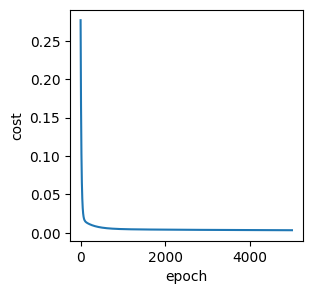

In [108]:
#plotting the graph
plt.figure(1, figsize=(3,3))
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [109]:
print(w)
print(sy.inverse_transform([[1]]))
def predict(area, bedroom, w,b):
    scaled_x = sx.transform([[area, bedroom]])
    print(scaled_x)
    scaled_price = scaled_x[0][0]*w[0] + w[1]* scaled_x[0][1] * w[1] + b
    #when we give a scaled price it return the non-scaled price, it is opposite of transform i.e which scale to smaller value
    print(sy.inverse_transform([[scaled_price]]))
    
predict(3300, 4 , w,b)

[0.75542854 0.41583882]
[[167.]]
[[0.86206897 0.75      ]]
[[121.65006845]]


D:\Environments\gen-ai-pyenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


#### stochastic gradient descent

In [121]:
import random
def stochastic_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    number_of_features = x.shape[1]
    #initialzing that no of weights with value all having 1
    w = np.ones(shape=(number_of_features))
    samples_count = x.shape[0]
    bias = 0
    #no of samples
    n = x.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        random_index = random.randint(0,samples_count-1) # random index from total samples
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/samples_count)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/samples_count)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        bias = bias - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],),5000)  
w, b, cost

(array([0.66204592, 0.56606028]), -0.11684836015389075, 0.0010711057381104486)

##### Chain rule -> the crux of using layers of neurons to form final answer.

#### here, in the internal layers some intermediate equations would be formed which would finally converage to the required no of input and output

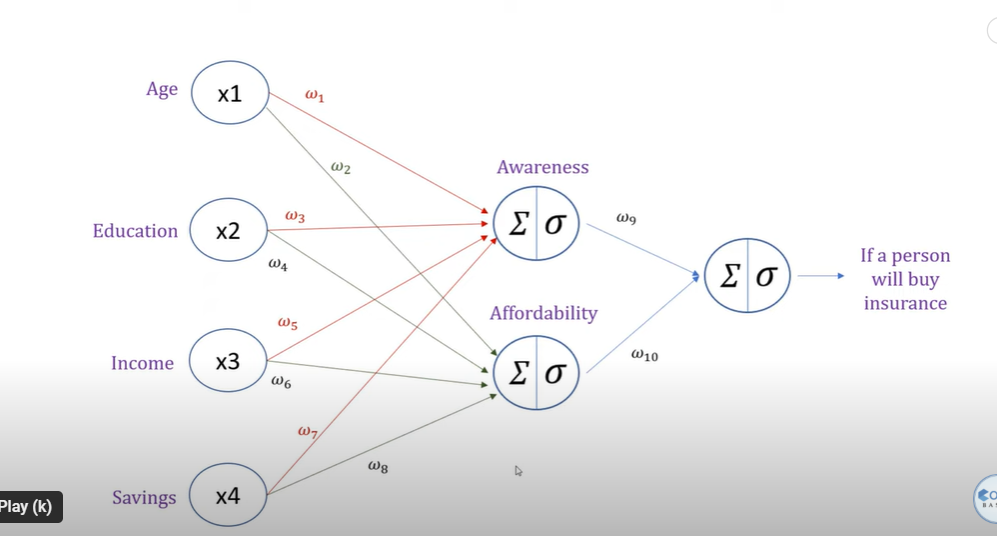

#### see in this below image how the final output will be a function of intial inputs, the intermediate things will be eliminated finally using the concept of chain rules
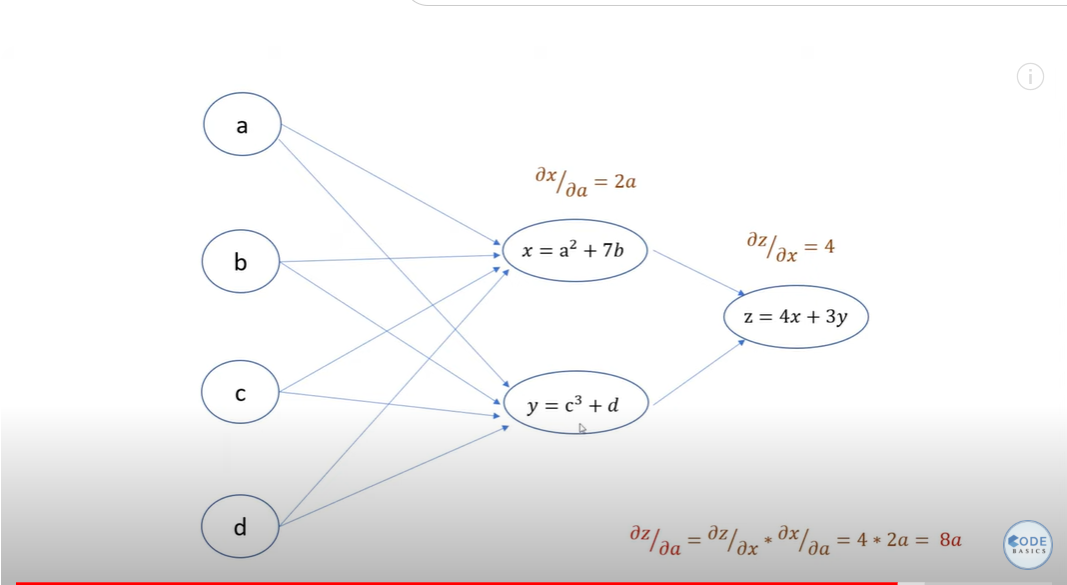

#### Tensorboard

In [18]:
(X_train , y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [22]:
X_train.shape
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [29]:
X_train = X_train/255
X_test = X_test/255

In [36]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(100, activation='relu'),
        #since we require output in range of 0-9 
        keras.layers.Dense(10,activation='sigmoid')
    ]
)

model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])


In [37]:
import tensorflow as tf

##### callbacks are the functions which are some inbuilt we can also custom define such callbacks , which can be called at certain stages of training , predictions etc, eg for saving tensorboard logs, saving model checkpoint, early stopping etc

In [38]:
#defining the call back for tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)
model.fit(X_train, y_train, epochs=5, callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3001 - accuracy: 0.1212
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2996 - accuracy: 0.1124
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2992 - accuracy: 0.1124
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2988 - accuracy: 0.1124
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2984 - accuracy: 0.1124


### ANN (artificial neural network )

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('customer_churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.drop('customerID', axis='columns', inplace=True)

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#totalCharges are not in integer or number but rather in string format so let's convert it in form of number
df[pd.to_numeric(df.MonthlyCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [9]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [10]:
df1 = df[df['TotalCharges'] != ' ']

In [11]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.dtypes

C:\Users\Ravindra\AppData\Local\Temp\ipykernel_23628\3277851254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


dtype('float64')

In [13]:
no_churn_tenure = df1[df1.Churn=='No'].tenure
yes_churn_tenure =  df1[df1.Churn=='Yes'].tenure

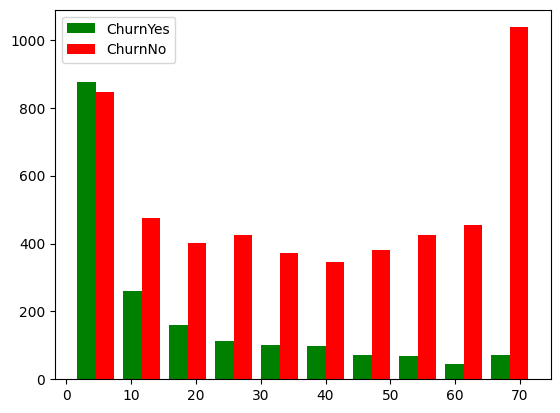

In [14]:
plt.hist([yes_churn_tenure, no_churn_tenure], color =['green', 'red'], label = ['ChurnYes', 'ChurnNo'])
plt.legend()

In [15]:
def unique_col_values(df1):
    for column in df1:
        #if data type is string print their unqiue values
        if df[column].dtypes == 'object':
            #print the column name and their unique value
            print(f"{column} -> {df1[column].unique()}")
unique_col_values(df1)

gender -> ['Female' 'Male']
Partner -> ['Yes' 'No']
Dependents -> ['No' 'Yes']
PhoneService -> ['No' 'Yes']
MultipleLines -> ['No phone service' 'No' 'Yes']
InternetService -> ['DSL' 'Fiber optic' 'No']
OnlineSecurity -> ['No' 'Yes' 'No internet service']
OnlineBackup -> ['Yes' 'No' 'No internet service']
DeviceProtection -> ['No' 'Yes' 'No internet service']
TechSupport -> ['No' 'Yes' 'No internet service']
StreamingTV -> ['No' 'Yes' 'No internet service']
StreamingMovies -> ['No' 'Yes' 'No internet service']
Contract -> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -> ['Yes' 'No']
PaymentMethod -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges -> [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn -> ['No' 'Yes']


In [16]:
df1.replace('No phone service', 'No', inplace=True)
df1.replace('No internet service', 'No', inplace=True)
df1

C:\Users\Ravindra\AppData\Local\Temp\ipykernel_23628\227639667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)
C:\Users\Ravindra\AppData\Local\Temp\ipykernel_23628\227639667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [17]:
#replacing yes with 1 and no with 0
df1.replace({'Yes':1, 'No': 0}, inplace= True)
df1

C:\Users\Ravindra\AppData\Local\Temp\ipykernel_23628\3369444711.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({'Yes':1, 'No': 0}, inplace= True)
C:\Users\Ravindra\AppData\Local\Temp\ipykernel_23628\3369444711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({'Yes':1, 'No': 0}, inplace= True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [18]:
unique_col_values(df1)

gender -> ['Female' 'Male']
Partner -> [1 0]
Dependents -> [0 1]
PhoneService -> [0 1]
MultipleLines -> [0 1]
InternetService -> ['DSL' 'Fiber optic' 0]
OnlineSecurity -> [0 1]
OnlineBackup -> [1 0]
DeviceProtection -> [0 1]
TechSupport -> [0 1]
StreamingTV -> [0 1]
StreamingMovies -> [0 1]
Contract -> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -> [1 0]
PaymentMethod -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges -> [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn -> [0 1]


In [19]:
df1['gender'].replace({'Female':1, 'Male': 0}, inplace= True)
df1

C:\Users\Ravindra\AppData\Local\Temp\ipykernel_23628\510325319.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1, 'Male': 0}, inplace= True)
C:\Users\Ravindra\AppData\Local\Temp\ipykernel_23628\510325319.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gen

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


##### doing one hot encoding -> this is the method of converting catogrical data into numerical values , i.e if we can convert the InternetService column into three column where each unique value represent a column and all the rows having that value in that column will be one and all other values will be 0

In [20]:
#doing one hot encoding
df2 = pd.get_dummies(data = df1, columns = ['InternetService'] )
df2.dtypes
df2.drop(['Contract','PaymentMethod','InternetService_0'], axis='columns', inplace=True)
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,True,False
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,True,False
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,True,False
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,True,False
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,True,False
7039,1,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,False,True
7040,1,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,True,False
7041,0,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,False,True


##### scaling down the values in range of 0 to 1 from -inf to +inf

In [21]:
#threee columns are there which are not in range of 0 to 1 so let's use minmax scaler to bring them in this range
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])
df2


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,True,False
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,True,False
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,True,False
3,0,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,True,False
4,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,1,1,1,1,0.662189,0.227521,0,True,False
7039,1,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,0,False,True
7040,1,0,1,1,0.140845,0,0,1,0,0,0,0,0,1,0.112935,0.037809,0,True,False
7041,0,1,1,0,0.042254,1,1,0,0,0,0,0,0,1,0.558706,0.033210,1,False,True


In [24]:
#checking if there are everything in our required ranges and no string datatypes
df2['InternetService_DSL'] = df2['InternetService_DSL'].astype(int)
df2['InternetService_Fiber optic'] = df2['InternetService_Fiber optic'].astype(int)
# unique_col_values(df2)

In [25]:
df2


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0
3,0,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0
4,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,1,1,1,1,0.662189,0.227521,0,1,0
7039,1,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,0,0,1
7040,1,0,1,1,0.140845,0,0,1,0,0,0,0,0,1,0.112935,0.037809,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,0,0,0,1,0.558706,0.033210,1,0,1


In [26]:
df2.columns
df2['InternetService_DSL']

0       1
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    1
7041    0
7042    0
Name: InternetService_DSL, Length: 7032, dtype: int32

In [27]:
Y = df2['Churn']
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [28]:
X = df2.drop('Churn',axis = 'columns')

In [29]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic
0,1,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,1,0
2,0,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,0
3,0,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,1,0
4,1,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,1,1,1,1,0.662189,0.227521,1,0
7039,1,0,1,1,1.000000,1,1,0,1,1,0,1,1,1,0.845274,0.847461,0,1
7040,1,0,1,1,0.140845,0,0,1,0,0,0,0,0,1,0.112935,0.037809,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,0,0,0,1,0.558706,0.033210,0,1


In [30]:
len(X)

7032

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
X_train.shape

(5625, 18)

In [32]:
X_test.shape

(1407, 18)

In [33]:
len(X_train.columns)

18

In [34]:
#creating model train
model_churn = keras.Sequential(
    [
        keras.layers.Dense(15,input_shape = (18,), activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [35]:
model_churn.compile(optimizer='adam', 
                    loss = 'binary_crossentropy',
                    metrics=['accuracy']
                   )


In [37]:
model_churn.fit(X_train, y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.5204 - accuracy: 0.7484
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.7845
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.7964
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.8014
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8044
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8055
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.8052
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8043
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4176 - accura

In [38]:
model_churn.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7846


[0.455342561006546, 0.7846481800079346]

In [39]:
prediction = model_churn.predict(X_test)
prediction[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.250675  ],
       [0.4083093 ],
       [0.0281062 ],
       [0.77150035],
       [0.61865616]], dtype=float32)

In [40]:
#the above is 2d output let's get 1-d output
pred_1d = []
for el in prediction:
    if el[0]> 0.5:
        pred_1d.append(1)
    else:
        pred_1d.append(0)


In [41]:
pred_1d[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

In [42]:
y_test[:10] 

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

#### True positive, Precision, Recall, True negative

##### True Positive -> POSITIVE , the things that we are trying to predicit, eg . in given images we are predict if the given image is dog
##### so Dog which we want to predict is POSITIVE term denotion
##### True Positive -> positive means dog and , true means the number of items where dog is correctly detected
##### False Positive -> the places where dog is wrongly pridicted , means , the images which were not dog and the model predicted saying it is dog
##### True Negative -> NEGATIVE = the other images which are not dog , true negative means the model detected correctly the non dog images, 
##### False Negative -> it means the image were not non-dog but the model said that they were non-dog , it means the model wrongly detected the non-dog images
##### Accuracy -> all the predictions that we got right i.e sum of true positive and true negative / all the input
##### Precision -> suppose out of 100 images , the model predicted 40 images as dog images , out of which 30 were true positive and 10 were false positive so the precision is 30/40 i.e true positive / (True positive + false positive),
    ---> precision in case of Negative -> True Negative / True Negative + False Negative
##### Recall -> how many images in Reality are truth images let's say 60 images are Dog images in the given sample and the model predicted 30 images correctly as Dog images(true positive) => Recall = True Positive / (All Dog images in reality) => True Positive / True Positive + False Negative
    ----> Recall for NEGATIVES  true negative / true negative + false positive

##### ***important , when thinking about precision think about predicition as total set , whereas in case of recall think Truth input as base
F1 score -> harmonic mean of precision and recall formumal = precision* recall /(precision + recall)

#### Regularization

regularization -> this is the process of tackling the issue of OVER FITTING , so we drop some neurons to tackle the overfitting issue

In [43]:
import pandas as pd

In [47]:
#when we pass header is none we are telling there are no header in the dataset so please create headers for me
df = pd.read_csv('sonar_dataset.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [49]:
#no of na in each column, the sum does the sum column wise
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [50]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [54]:
#counting the different type of values in that column
df[60].value_counts()


60
M    111
R     97
Name: count, dtype: int64

In [62]:
#forming x and y
X = df.drop(60, axis= 'columns')
Y = df[60]
Y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [65]:
#there are just two values in Y so let's do replacement instead of doing one hot encoding
Y.unique()

array(['R', 'M'], dtype=object)

In [69]:
#since the Y values are non integers so let's convert into integer [0,1]
Y.replace({'R': 0, 'M':1},inplace =True)
Y

C:\Users\Ravindra\AppData\Local\Temp\ipykernel_23628\1860190477.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y.replace({'R': 0, 'M':1},inplace =True)


0      0
1      0
2      0
3      0
4      0
      ..
203    1
204    1
205    1
206    1
207    1
Name: 60, Length: 208, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [77]:
X_train.shape , y_train.shape, X_test.shape

((166, 60), (166,), (42, 60))

In [73]:
y_train.head()

178    1
52     0
99     1
98     1
47     0
Name: 60, dtype: int64

In [79]:
model = keras.Sequential([
    #same neurons is done to see the example of regularization
    keras.layers.Dense(60, input_shape = (60,), activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

In [81]:
#the batch size parameter is defining the size of each batch
model.fit(X_train, y_train, epochs= 100, batch_size= 8)

Epoch 1/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9759
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0887 - accuracy: 0.9759
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0635 - accuracy: 0.9819
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 0.9639
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2032 - accuracy: 0.9036
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0895 - accuracy: 0.9639
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0606 - accuracy: 0.9880
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9819
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0439 - accuracy: 0.9880
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9880
Epoch 11/

In [83]:
#in the training step the model gave the accuracy of 1 and here in evaluation it gave a accuracy of 0.78 it means the model got overfitted

model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 1.4102 - accuracy: 0.7857


[1.4101921319961548, 0.7857142686843872]

In [86]:
y_pred = model.predict(X_test)
y_pred[:10]

2/2 [==============================] - 0s 19ms/step


array([[9.9509094e-09],
       [2.4114084e-07],
       [8.9092606e-01],
       [9.9999291e-01],
       [2.6182210e-09],
       [2.9013498e-02],
       [3.5915389e-03],
       [9.9963224e-01],
       [9.9995011e-01],
       [7.1815684e-06]], dtype=float32)

In [88]:
y_pred_final = []
for i in y_pred:
    if i[0]> 0.5:
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)



In [89]:
y_pred_final[:10]

[0, 0, 1, 1, 0, 0, 0, 1, 1, 0]

In [87]:
y_test[:10]

58     0
63     0
35     0
19     0
59     0
56     0
83     0
105    1
121    1
76     0
Name: 60, dtype: int64

In [90]:
#calculating the scores
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78        24
           1       0.68      0.94      0.79        18

    accuracy                           0.79        42
   macro avg       0.81      0.81      0.79        42
weighted avg       0.83      0.79      0.78        42



In [91]:
print(confusion_matrix(y_test, y_pred_final))

[[16  8]
 [ 1 17]]


##### introducing dropout layer in the above model

In [103]:
#let's introduce dropout layer in the above model
#*** USUAL PRACTICE the dropout layer is put after the hidden layers
model_dropout = keras.Sequential([
    #same neurons is done to see the example of regularization
    keras.layers.Dense(60, input_shape = (60,), activation='relu'),
    #dropping out 50% of the neurons
    keras.layers.Dropout(0.2),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])
model_dropout.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

In [104]:
model_dropout.fit(X_train, y_train, epochs= 100, batch_size=8)

Epoch 1/100
21/21 [==============================] - 1s 3ms/step - loss: 0.6958 - accuracy: 0.5542
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6746 - accuracy: 0.5964
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6584 - accuracy: 0.6024
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6086 - accuracy: 0.6386
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6335 - accuracy: 0.6205
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6073 - accuracy: 0.6807
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5976 - accuracy: 0.6687
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.7289
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5357 - accuracy: 0.7651
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4985 - accuracy: 0.7771
Epoch 11/

In [105]:
model_dropout.evaluate(X_test, y_test)

2/2 [==============================] - 0s 0s/step - loss: 1.0762 - accuracy: 0.8333


[1.0762338638305664, 0.8333333134651184]

### CONVULATIONAL NEURAL NETWORKS

#DISADVANTANGES OF ANN
1. too much computation
2. treat local pixels same as pixels apart
3. sensitive to location of an object in an image

##### FILTERS -> the feature detectors in a convolutaional NN, eg. nose detector, eye detector. we move these filters on the input images and it generate FEATURE MAP


##### in the below image see how the filter for detecting circle in the image detect the circle and how the output feature map is marked with 1

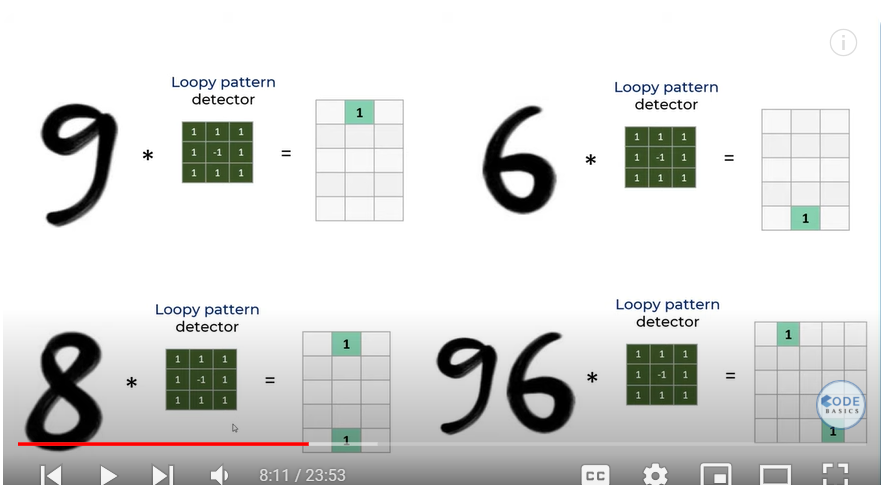

##### The number of features we are detecting that no of feature map will be generated , each filter will give one filter map


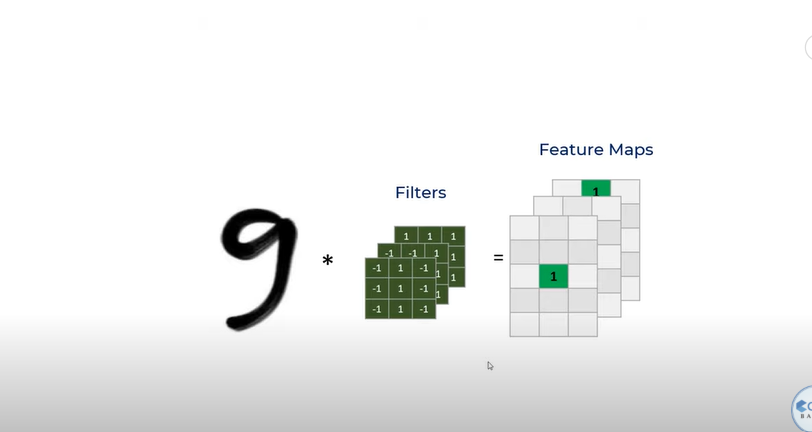

##### working of convolutional neural network
##### in first part we detect the features and then we flatten the ouput of feature detection and then do the classification, as can be seen in the below image


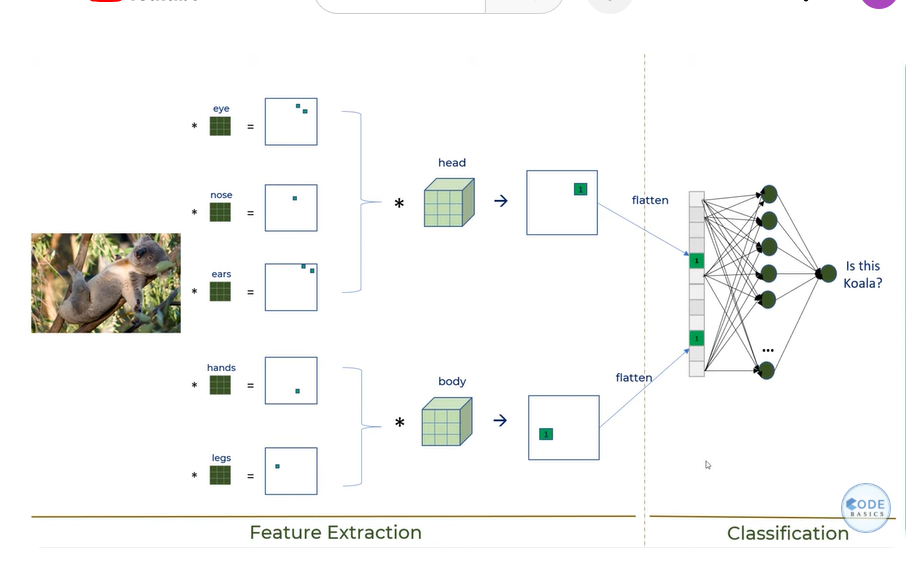

##### relu in the convolutional neural network , after getting the feature map it , it does the activation thing and the values of feature map are brought in the range of 0 and 1

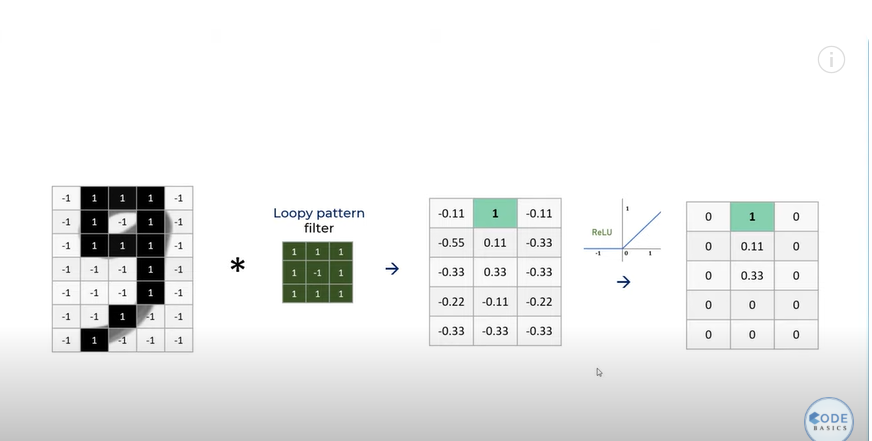

##### POOLING in the above image, we still have the feature map as same size as the input, which will be heavy computation because images has large number of dimension, eg (1920, 1080, 3) i.e in no of neurons 1920*1080*3,
##### so to solve this issue we use the concept of POLLING , what we do is we move a pooling filter on the feature map and it will do max pooling, average pooling or whatever type of polling we have applied

##### benefits of pooling, 
    1. reduces dimensions & computations
    2. reduces overfitting as there are less parameters
    3. model is tolerant towards variations, destortions
##### look in the below image, we have applied max polling
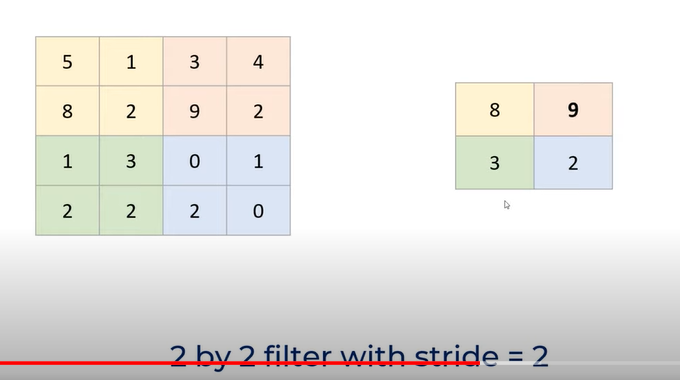

##### so the entire process process look like, in the below image
feature detection -> apply activation function -> pooling(to reduce the computation)
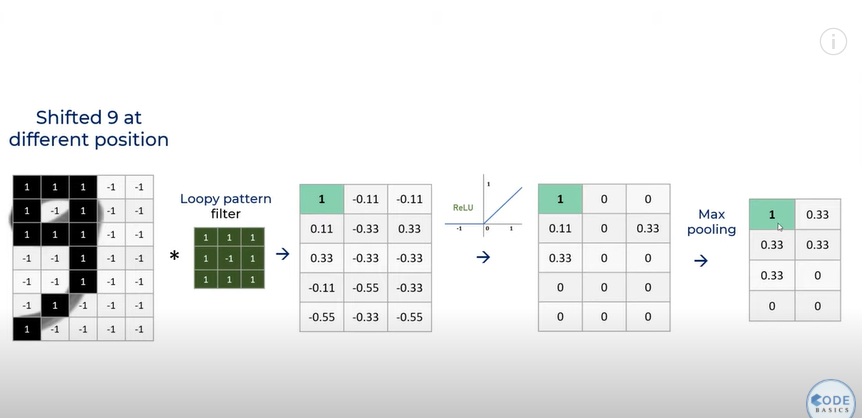

##### so a entire convolutational based models look like below
##### the first part is we are detecting features and trying to reduce the dimensions of the input , the second part is same ANN(classification part) doing simple classification

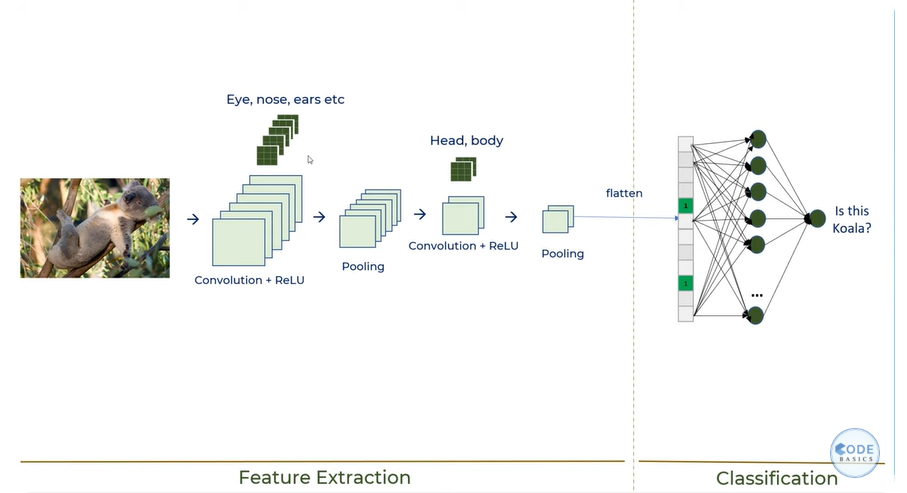

##### benefits of convolution
    1. connections sparsity reduces overfitting
    2. conv + pooling gives location invariant feature detection
    3. parameter sharing

##### benefits of relu
    1. introduces nonlinearity
    2. speed up training, faster to compute
##### benefits of pooling,
    1. reduces dimensions & computations
    2. reduces overfitting as there are less parameters
    3. model is tolerant towards variations, destortions

##### for rotation and scale CNN cannot handle by itself and hence, we use data augumentation techniques to generate such samples 

#### creating a conv based model

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [48]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [49]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [50]:
output_classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [51]:
#it is 2d array ,let's shape it into 1d array
y_train[:10]

#reshaping the y_train from 2d to 1d
#here -1 is saying that we will keep the first shape parameter same, and other the index we are flattening
y_train = y_train.reshape((-1,))
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [52]:
def plot_image(X,y, index):
    plt.figure(figsize=(10,2))
    plt.imshow(X[index])
    plt.xlabel(output_classes[y[index]])

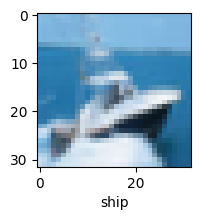

In [53]:
plot_image(X_train, y_train,8 )

In [54]:
X_train.shape, y_train.shape, X_test.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3))

In [55]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [56]:
#the images have values from 0 - 255 let's reduce it
X_train = X_train/255
X_test = X_test/255

In [57]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

##### let's create a ANN artificial neural network first and then we will create a conv nn to test the comparison of performance

In [58]:
import keras

##### ANN or artificial neural network : neural network which consist of flatten, dense, dropout etc normal layers , not like conv2d and all

In [59]:
#ANN
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(250, activation="relu"),
    keras.layers.Dense(10,activation='sigmoid')
])
ann_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
ann_model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8553 - accuracy: 0.3317
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6732 - accuracy: 0.4006
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5843 - accuracy: 0.4337
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5326 - accuracy: 0.4526
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5051 - accuracy: 0.4634


In [61]:
ann_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.5117 - accuracy: 0.4592


[1.5117155313491821, 0.459199994802475]

In [65]:
y_predict = ann_model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [77]:
y_predict_single_row = []
for row in y_predict:
    y_predict_single_row.append(np.argmax(row))

In [78]:
y_predict_single_row[:10]

[6, 8, 8, 8, 4, 6, 3, 2, 2, 1]

In [79]:
y_test[:10]
y_test.shape
y_test_single_row = y_test.reshape((-1,))
y_test_single_row[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
print(classification_report(y_test_single_row, y_predict_single_row))

              precision    recall  f1-score   support

           0       0.51      0.56      0.53      1000
           1       0.58      0.58      0.58      1000
           2       0.32      0.26      0.29      1000
           3       0.38      0.11      0.17      1000
           4       0.36      0.48      0.41      1000
           5       0.45      0.31      0.37      1000
           6       0.38      0.68      0.49      1000
           7       0.57      0.47      0.52      1000
           8       0.50      0.70      0.58      1000
           9       0.58      0.44      0.50      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.44     10000
weighted avg       0.46      0.46      0.44     10000



##### convolutional neural network cnn

##### difference between softmax and sigmoid layers, sigmoid output normal probability , eg. 
#the output of first and second of two type in  binary crossentropy is this in case of sigmoid
1: .46
2: .55
in case of softmax, the first output will be .45 / (.45 + .56), second output .55 / (.45 + .56)
in case of sigmoid we not necessarily get 1 on summing up all the values

In [86]:
cnn_model = keras.Sequential([
    #in below conv2d layer filters are no of number of features we want to detect in the image, kernal_size is the shape of the filter that will be moved
    keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation = 'relu', input_shape = (32,32,3)),
    #it pools the maximum of 4 pixels i.e 2*2 shape box to the maximum value in the 2*2 box
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=12,kernel_size=(3,3), activation = 'relu'),
    #it pools the maximum of 4 pixels i.e 2*2 shape box to the maximum value in the 2*2 box
    keras.layers.MaxPooling2D((2,2)),
    #below layers are ann
    #we don't require to pass the input_shape in internal layers the model will figure out by itself
    keras.layers.Flatten(),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(250, activation="relu"),
    keras.layers.Dense(10,activation='softmax')
])

cnn_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [87]:
cnn_model.fit(X_train, y_train, epochs= 5)

Epoch 1/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4556 - accuracy: 0.4665
Epoch 2/5
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1197 - accuracy: 0.6042
Epoch 3/5
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9639 - accuracy: 0.6600
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8437 - accuracy: 0.7062
Epoch 5/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7433 - accuracy: 0.7391


In [88]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9385 - accuracy: 0.6800


[0.93850177526474, 0.6800000071525574]

In [90]:
cnn_output = cnn_model.predict(X_test)
cnn_output

313/313 [==============================] - 1s 4ms/step


array([[9.9138694e-04, 7.0550980e-04, 4.8309490e-02, ..., 1.0199969e-03,
        6.7362923e-04, 1.8079127e-03],
       [7.2011962e-03, 4.1486523e-03, 1.8120732e-05, ..., 4.5046959e-06,
        9.8620319e-01, 2.4027440e-03],
       [7.1601585e-02, 1.8368842e-02, 2.2781168e-03, ..., 1.1308778e-03,
        8.0039930e-01, 9.8864496e-02],
       ...,
       [3.0067313e-05, 1.2386774e-05, 2.4441909e-02, ..., 3.9007211e-01,
        5.4761320e-05, 1.8741895e-05],
       [6.5303822e-03, 2.1642183e-01, 1.4495425e-02, ..., 3.1410547e-03,
        1.0940860e-04, 6.9485335e-03],
       [3.6734309e-07, 2.4569613e-07, 2.5238769e-05, ..., 9.9596006e-01,
        1.4932070e-07, 2.8463384e-07]], dtype=float32)

In [91]:
cnn_output_single_row = []
for row in cnn_output:
    cnn_output_single_row.append(np.argmax(row))

In [92]:
cnn_output_single_row[:10]

[3, 8, 8, 0, 4, 6, 3, 4, 3, 1]

In [94]:
y_test_single_row[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)